In [22]:
import cv2
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd

In [23]:
# Load the input image
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')
image3 = cv2.imread('image3.jpg')
image4 = cv2.imread('image4.jpg')

# converting from BGR to RGB color channel
img_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
img_rgb3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
img_rgb4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)





Text(0.5, 1.0, 'Resized Image4')

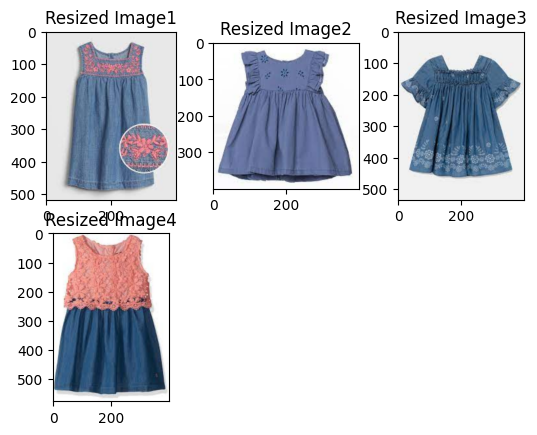

In [24]:
height, width = image1.shape[:2]
aspect_ratio = width / height
resized_width = 400
resized_height = int(resized_width / aspect_ratio)
resized_image1 = cv2.resize(image1, (resized_width, resized_height))

height, width = image2.shape[:2]
aspect_ratio = width / height
resized_width = 400
resized_height = int(resized_width / aspect_ratio)
resized_image2 = cv2.resize(image2, (resized_width, resized_height))

height, width = image3.shape[:2]
aspect_ratio = width / height
resized_width = 400
resized_height = int(resized_width / aspect_ratio)
resized_image3 = cv2.resize(image3, (resized_width, resized_height))

height, width = image4.shape[:2]
aspect_ratio = width / height
resized_width = 400
resized_height = int(resized_width / aspect_ratio)
resized_image4 = cv2.resize(image4, (resized_width, resized_height))


plt.subplot(231), plt.imshow(cv2.cvtColor(resized_image1, cv2.COLOR_BGR2RGB))
plt.title('Resized Image1')
plt.subplot(232), plt.imshow(cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB))
plt.title('Resized Image2')
plt.subplot(233), plt.imshow(cv2.cvtColor(resized_image3, cv2.COLOR_BGR2RGB))
plt.title('Resized Image3')
plt.subplot(234), plt.imshow(cv2.cvtColor(resized_image4, cv2.COLOR_BGR2RGB))
plt.title('Resized Image4')






In [25]:
gray_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2GRAY)
gray_image3 = cv2.cvtColor(resized_image3, cv2.COLOR_BGR2GRAY)
gray_image4 = cv2.cvtColor(resized_image4, cv2.COLOR_BGR2GRAY)



In [26]:
roi1 = gray_image1[0:200, 0:200]
roi2 = gray_image2[0:200, 0:200]
roi3 = gray_image3[0:200, 0:200]
roi4 = gray_image4[0:200, 0:200]


In [27]:
height, width = roi1.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated_image1 = cv2.warpAffine(roi1, rotation_matrix, (width, height))

height, width = roi2.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated_image2 = cv2.warpAffine(roi2, rotation_matrix, (width, height))

height, width = roi3.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated_image3 = cv2.warpAffine(roi3, rotation_matrix, (width, height))

height, width = roi4.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated_image4 = cv2.warpAffine(roi4, rotation_matrix, (width, height))


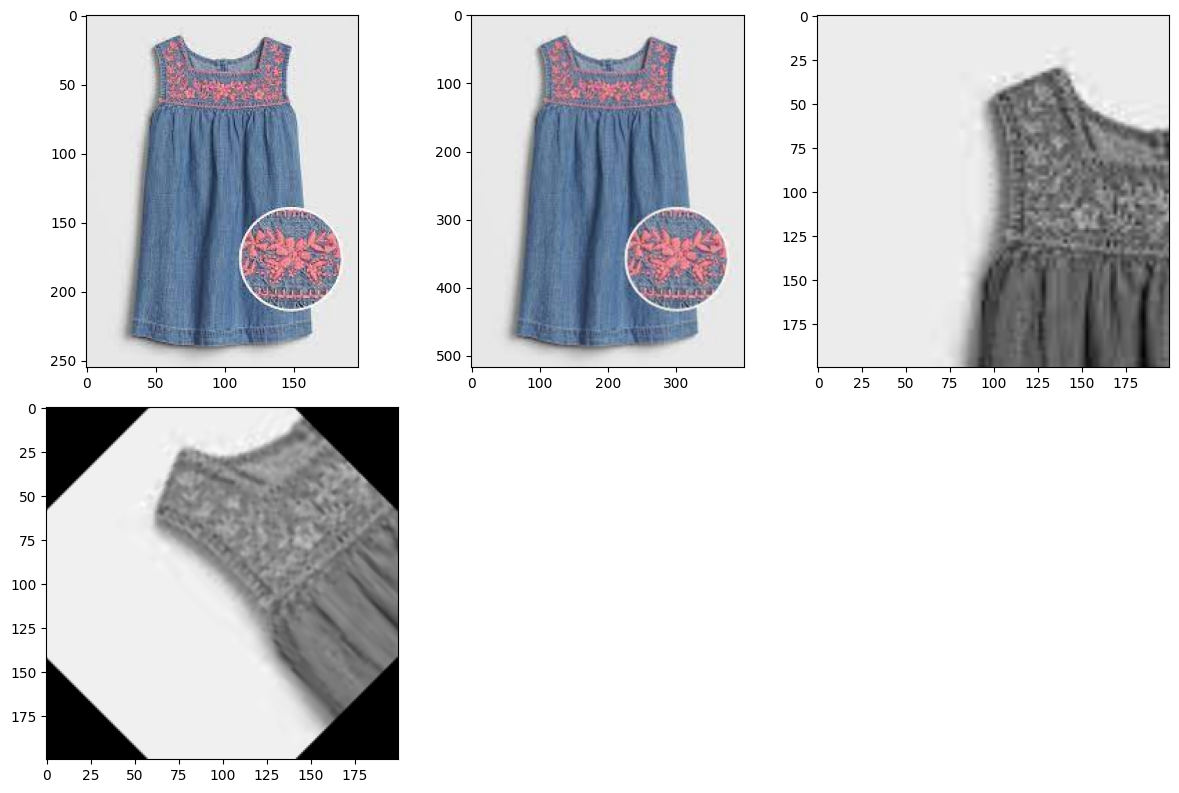

In [28]:
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.subplot(232), plt.imshow(cv2.cvtColor(resized_image1, cv2.COLOR_BGR2RGB))
plt.subplot(233), plt.imshow(roi1, cmap='gray')
plt.subplot(234), plt.imshow(rotated_image1, cmap='gray')
plt.tight_layout()
plt.show()


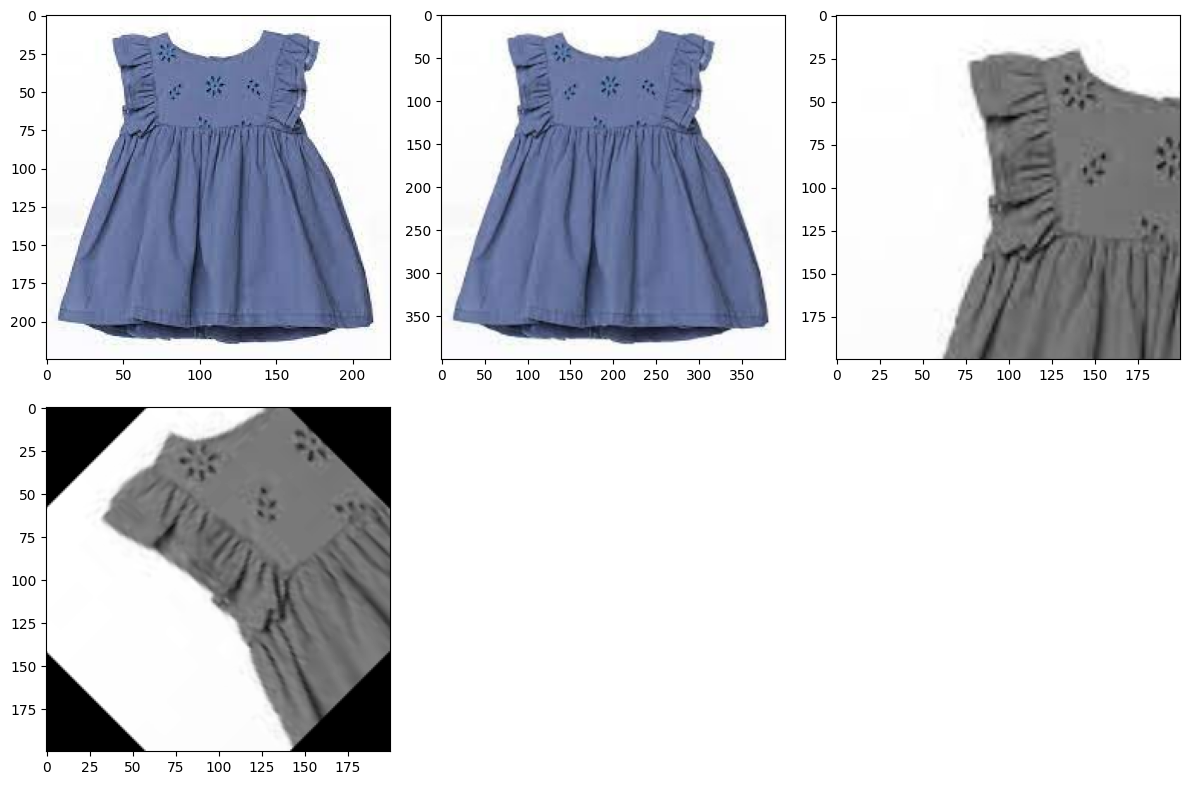

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.subplot(232), plt.imshow(cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB))
plt.subplot(233), plt.imshow(roi2, cmap='gray')
plt.subplot(234), plt.imshow(rotated_image2, cmap='gray')
plt.tight_layout()
plt.show()


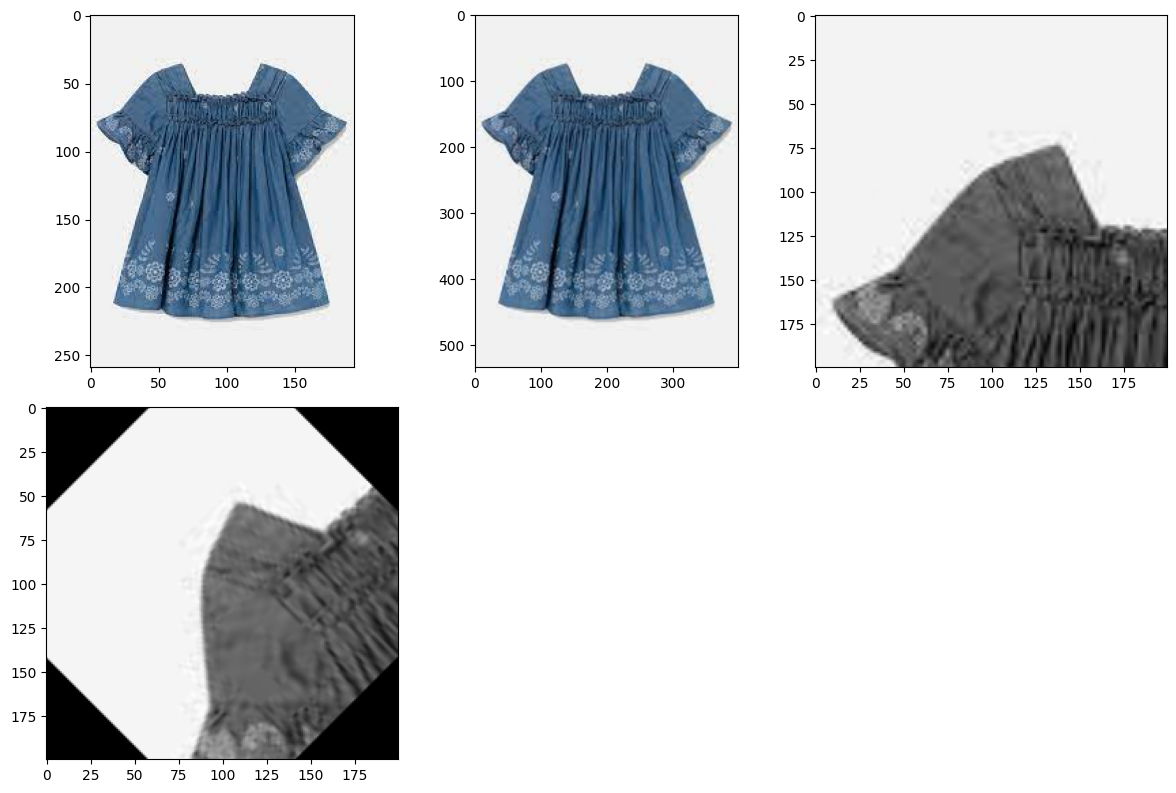

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.subplot(232), plt.imshow(cv2.cvtColor(resized_image3, cv2.COLOR_BGR2RGB))
plt.subplot(233), plt.imshow(roi3, cmap='gray')
plt.subplot(234), plt.imshow(rotated_image3, cmap='gray')
plt.tight_layout()
plt.show()


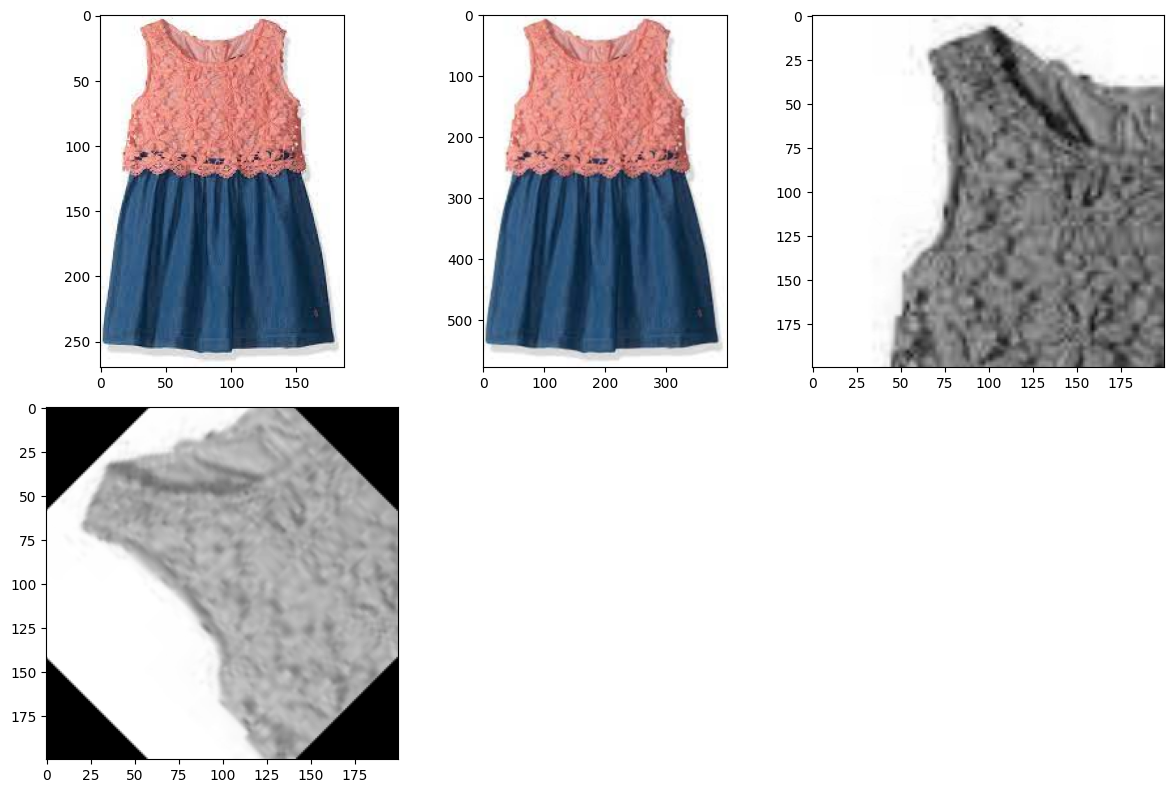

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
plt.subplot(232), plt.imshow(cv2.cvtColor(resized_image4, cv2.COLOR_BGR2RGB))
plt.subplot(233), plt.imshow(roi4, cmap='gray')
plt.subplot(234), plt.imshow(rotated_image4, cmap='gray')
plt.tight_layout()
plt.show()


In [39]:

data = pd.read_csv('Dataset - WomensClothingE-CommerceReviews.csv')

text = data.read('Review Text')
filtered_data = data[data['Review Text']]

sent_tokens = sent_tokenize(filtered_data)
num_sent_tokens = len(sent_tokens)


word_tokens = word_tokenize(filtered_data)
num_word_tokens = len(word_tokens)


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
num_filtered_words = len(filtered_words)


porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]
num_stemmed_words = len(set(stemmed_words))


lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
num_lemmatized_words = len(set(lemmatized_words))


labels = ['Sentence Tokenization', 'Word Tokenization', 'Stopword Filtering', 'Stemming', 'Lemmatization']
values = [num_sent_tokens, num_word_tokens, num_filtered_words, num_stemmed_words, num_lemmatized_words]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('Text Preprocessing Steps')
plt.xlabel('Preprocessing Steps')
plt.ylabel('Number of Tokens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'read'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np


def jaccard_similarity(set1, set2):
    if len(set1) == 0 and len(set2) == 0:
        return 1
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union


stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = []
    for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(word)
    return filtered_tokens

general_text = pd.read('Division name')
general_petite = pd.read('Division name')
initmates = pd.read('Division name')

tokens1 = set(preprocess_text(general_text))
tokens2 = set(preprocess_text(general_petite))
tokens3 = set(preprocess_text(initmates))


similarity_score= jaccard_similarity(tokens1, tokens2,tokens3)

print(f"Jaccard Similarity Score: {similarity_score}")
print(tokens1,"\n",tokens2)

vectorizer = TfidfVectorizer()
vector1= vectorizer.fit_transform([general_text])
vector2= vectorizer.transform([general_petite])
vector3= vectorizer.transform([initmates])


cosine_similarity_score = cosine_similarity(vector1, vector2, vector3)
print(f"Cosine Similarity Score: {cosine_similarity_score}")



